# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_amount = {
    "shares": [1.2, 5.3]
}

# Set the tickers
crypto_assets = ["my_btc", "my_eth"]

# Create the shares DataFrame with `tickers` as index
df_crypto = pd.DataFrame(crypto_amount, index=crypto_assets)

# Display shares data
df_crypto


,shares
my_btc,1.2
my_eth,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()

In [6]:
btc_data['data']['1']['quotes']['CAD']['price']
eth_data['data']['1027']['quotes']['CAD']['price']

521.01777

In [7]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * df_crypto.loc["my_btc"]["shares"]
my_eth_value = eth_price * df_crypto.loc["my_eth"]["shares"]
crypto = my_btc_value+my_eth_value

my_btc = df_crypto.loc["my_btc"]["shares"]
my_eth = df_crypto.loc["my_eth"]["shares"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto asset is ${crypto:0.2f}")

The current value of your 1.2 BTC is $20359.12
The current value of your 5.3 ETH is $2761.39
The current value of your crypto asset is $23120.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
shares_amount = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["my_agg", "my_spy"]

# Create the shares DataFrame with `tickers` as index
df_portfolio = pd.DataFrame(shares_amount, index=tickers)

# Display shares data
df_portfolio


,shares
my_agg,200
my_spy,50


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-19", tz="America/New_York").isoformat()

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_shares = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_shares

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-19 00:00:00-04:00  117.81  117.87  117.72  117.787  4231106  348.62   

                                                             
                             high     low   close    volume  
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  54462156

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_shares['AGG']['close'])
spy_close_price = float(df_shares['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [12]:
my_spy = df_portfolio.loc["my_spy"]["shares"]
my_agg = agg_close_price * df_portfolio.loc["my_agg"]["shares"]


# Create the shares DataFrame with `tickers` as index
#df_shares = pd.DataFrame(shares_amount, index=tickers)

my_spy_value = spy_close_price * df_portfolio.loc["my_spy"]["shares"]
my_agg_value = agg_close_price * df_portfolio.loc["my_agg"]["shares"]
shares = my_spy_value + my_agg_value
portfolio_value = shares + crypto

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your shares asset is ${shares:0.2f}")
print(f"The current value of your portfolio asset is ${portfolio_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 23557.4 AGG shares is $23557.40
The current value of your shares asset is $40658.40
The current value of your portfolio asset is $63778.92


In [13]:
crypto

23120.5179306

### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame
saving = {
    "amount": [crypto, shares]
}
tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(saving, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,23120.517931
shares,40658.400000


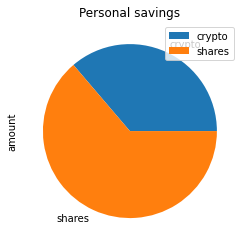

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal savings")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
portfolio_value = shares + crypto

short = emergency_fund - portfolio_value
short



-27778.9179306

In [17]:
# Validate saving health
if portfolio_value > emergency_fund:
    print("Congratulating for having enough money in this fund!")
elif portfolio_value == emergency_fund:
    print("Congratulating on reaching this financial goal!")
else:
    print(f"You are still {short} away from raching the goal!")

Congratulating for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
shares_amount = {
    "shares": [60, 40]
}

# Set the tickers
tickers = ["SPY", "AGG"]

timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head(15)

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   
2015-08-14 00:00:00-04:00  109.12  109.2400  109.020  109.09  1691391  208.45   
2015-08-17 00:00:00-04:00  109.33  109.3992  109.200  109.25  1212112  208.71   
2015-08-18 00:00:00-04:00  109.13  109.2400  109.040  109.09   709741  210.27   
2015-08-19 00:00:00-04:00  109.04  109.4800  108.960  109.43  1991745  209.10   
2015-08-20 00:00:00-04:00  109.58  109.6400  109.450  109.58   925926  206.51   
2015-08-21 00:00:00-04:00  109.68  109.8650  109.570  109.78  2297541  201.73   
2015-08-24 00:00:00-04:00  110.00  110.3400  109.570  109.73  5065966  187.33   
2015-08-25 00:00:00-04:00  109.70  109.7000  109.130  109.45  3843124  195.43   
2015-08-26 00:00:00-04:00  109.08  109.4100  108.880  108.95  3673170  192.08   
2015-08-27 00:00:00-04:00  108.95  109.1950  108.930  109.10  3454665  197.02   

                                                                 
                               high      low   close     volume  
2015-08-07 00:00:00-04:00  208.3400  206.870  207.93   87669782  
2015-08-10 00:00:00-04:00  210.6700  209.280  210.58   66755890  
2015-08-11 00:00:00-04:00  209.4700  207.760  208.63   88424557  
2015-08-12 00:00:00-04:00  209.1400  205.360  208.89  136171450  
2015-08-13 00:00:00-04:00  209.5500  208.010  208.63   77197796  
2015-08-14 00:00:00-04:00  209.5087  208.260  209.40   58555694  
2015-08-17 00:00:00-04:00  210.5800  208.160  210.58   67267031  
2015-08-18 00:00:00-04:00  210.6800  209.699  209.97   53829385  
2015-08-19 00:00:00-04:00  210.0100  207.350  208.32  137824475  
2015-08-20 00:00:00-04:00  207.1700  203.910  203.91  146502794  
2015-08-21 00:00:00-04:00  202.9200  197.530  197.54  259526049  
2015-08-24 00:00:00-04:00  195.8400  182.400  189.48  353841446  
2015-08-25 00:00:00-04:00  195.4500  187.060  187.24  270267060  
2015-08-26 00:00:00-04:00  194.7900  188.370  194.56  255843495  
2015-08-27 00:00:00-04:00  199.4100  195.210  199.28  226847229

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
?MCSimulation

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999985,1.000735,0.995464,1.007509,0.994706,0.993637,0.998447,0.999133,1.001539,1.007871,...,0.998789,0.999246,1.003396,1.007327,1.006910,1.004131,1.001130,1.002701,0.998416,1.000646
2,1.003568,0.997937,0.999375,1.008997,0.999225,0.986168,0.994148,0.992138,1.003008,1.004673,...,0.994607,1.003055,1.001759,1.007396,1.007826,1.009574,0.999849,0.986857,1.002189,1.002694
3,1.000449,0.997439,0.996746,0.999095,1.001891,0.984736,0.990588,0.985152,1.002137,1.011317,...,0.992630,1.000378,1.001857,1.016231,1.014406,1.015437,1.005894,0.978719,1.011414,1.004957
4,0.995832,1.000141,1.000355,0.986883,1.006674,0.974897,0.993702,0.984783,1.004380,1.009842,...,0.993401,1.011650,1.010156,1.009489,1.015489,1.018326,1.004092,0.975049,1.011416,1.011244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.324586,10.165297,4.106526,4.012941,4.361243,8.670171,8.681298,3.478744,12.930557,2.920229,...,4.189820,8.743775,6.144525,7.297202,5.999928,3.478282,5.211967,4.153380,7.067452,3.708155
7557,7.357906,10.083025,4.100772,4.022985,4.394372,8.749170,8.686015,3.488075,12.931494,2.930844,...,4.215799,8.758747,6.144421,7.293922,5.988182,3.470545,5.235203,4.092633,7.160890,3.728768
7558,7.341669,10.084115,4.097397,4.041360,4.434111,8.717585,8.692866,3.498820,12.990645,2.915957,...,4.176038,8.855697,6.169511,7.300984,5.971475,3.498192,5.224533,4.070637,7.225947,3.733924
7559,7.356647,10.049793,4.080027,4.045672,4.433518,8.777926,8.738197,3.508496,12.972985,2.908722,...,4.189654,8.852630,6.138728,7.274460,6.010843,3.481189,5.248764,4.095683,7.273126,3.693135


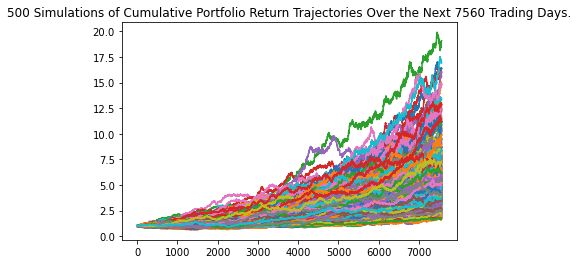

In [27]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

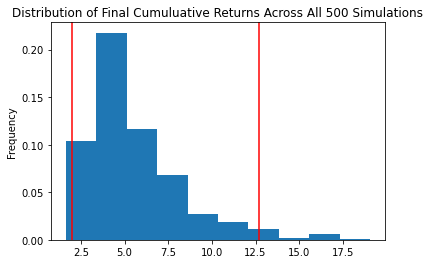

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()


### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl30 = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl30)


count           500.000000
mean              5.481420
std               2.763344
min               1.624373
25%               3.667384
50%               4.740974
75%               6.638379
max              19.072324
95% CI Lower      1.988996
95% CI Upper     12.700589
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl30[8]*initial_investment,2)
ci_upper = round(tbl30[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39779.92 and $254011.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl30[8]*initial_investment,2)
ci_upper = round(tbl30[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62405.16 and $350460.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
?MCSimulation

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

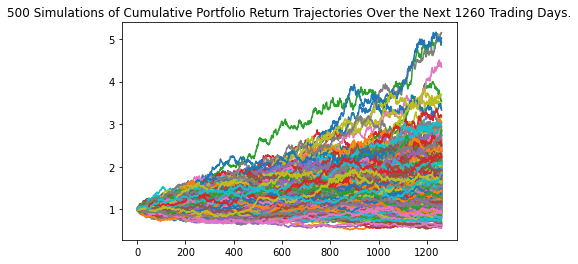

In [58]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

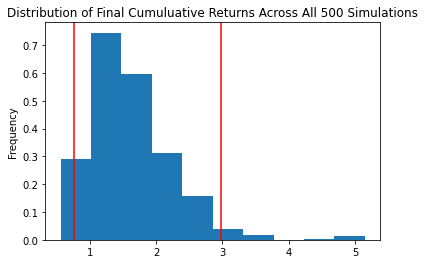

In [59]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.627889
std               0.628748
min               0.560551
25%               1.194694
50%               1.502308
75%               1.935387
max               5.149520
95% CI Lower      0.758076
95% CI Upper      2.979064
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15161.51 and $59581.27


### Ten Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
?MCSimulation

MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [63]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

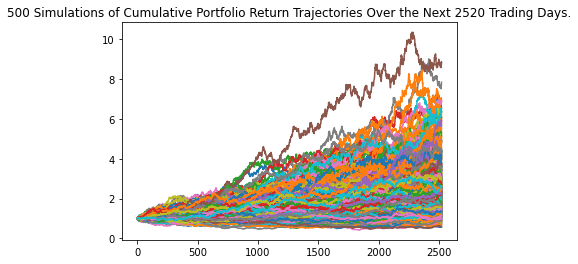

In [64]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

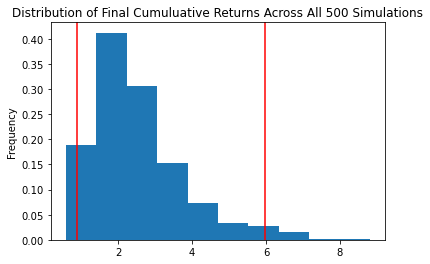

In [65]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count           500.000000
mean              2.520575
std               1.257735
min               0.574124
25%               1.662714
50%               2.229323
75%               3.052588
max               8.822467
95% CI Lower      0.873224
95% CI Upper      5.967335
Name: 2520, dtype: float64


In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl10[8]*initial_investment,2)
ci_upper_ten = round(tbl10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $17464.48 and $119346.69
